## Wrangle & Analyze Data
**By Tamer Ahmed**

wrangling WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. 
The Twitter archive only contains very basic tweet information. Using Python and its libraries, we will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it.

In [270]:
import seaborn as sns
import datetime as dt
import json
import numpy as np
import pandas as pd
import re
import requests
import tweepy

# Gather

In [271]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [272]:
tsv_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(tsv_url)

with open(tsv_url.split('/')[-1], mode = 'wb') as file:
    file.write(r.content)
    
images = pd.read_csv('image-predictions.tsv', sep = '\t')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [273]:
#https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
auth = tweepy.OAuthHandler('5Uur0mo4ol2kB8yhtZ1VxXS0u', 'h8E7fSpXWiMoBel7G1ZOAeu4Mgru0v0MtxH5ehYE1RKM89SiBH')
auth.set_access_token('303562412-ct9aNnU0FQR0UKJVn1i1W3Y8omqSewiQWUcRaygB', 'D3qslrbdOU5fqTOp951kOIuZbkeTPBodnjNYoEGFR63Ft')
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)


In [7]:
#Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
tweet_ids = twitter_archive.index
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in tweet_ids:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 609
Rate limit reached. Sleeping for: 608


In [8]:
print("The list of tweets" ,len(list_of_tweets))
print("The list of tweets no found" , len(cant_find_tweets_for_those_ids))

The list of tweets 2337
The list of tweets no found 19


In [254]:
my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)

In [255]:
#write this list into a txt file:
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [256]:
#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorites': int(favorite_count),
                             'retweets': int(retweet_count),
                            })
        tweets = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorites','retweets'])

In [274]:
tweets

,tweet_id,favorites,retweets
0,892420643555336193,37615,8199
1,892177421306343426,32324,6065
2,891815181378084864,24354,4011
3,891689557279858688,40937,8362
4,891327558926688256,39144,9054
5,891087950875897856,19681,3007
6,890971913173991426,11509,1986
7,890729181411237888,63458,18220
8,890609185150312448,27070,4125
9,890240255349198849,31013,7122


In [275]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id     2337 non-null object
favorites    2337 non-null int64
retweets     2337 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


# Assess

In [276]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [277]:
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
the            8
Sadie          8
Toby           7
Buddy          7
Daisy          7
Bailey         7
an             7
Jack           6
Bella          6
Leo            6
Scout          6
Rusty          6
Milo           6
Dave           6
Stanley        6
Oscar          6
Jax            6
Koda           6
Gus            5
            ... 
Tom            1
Geno           1
Combo          1
Devón          1
Fynn           1
Danny          1
Acro           1
Edmund         1
Grey           1
Mabel          1
Ashleigh       1
Cheesy         1
Gustav         1
Superpup       1
Dante          1
Pip            1
Marq           1
Enchilada      1
Fabio          1
Swagger        1
Augie          1
Ricky          1
Eevee          1
Zeus           1
Schnitzel      1
Sailer         1
Noosh          1
Bruno         

In [278]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [279]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [280]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [281]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Clean
	change datatype of tweet_id i tables into object(**Tidiness-1**)

	2.colect all data of three tables into one table(**Tidiness-2**)

	Condensing Dog Type columns(**Tidiness-3**)

	Condensing dog breed predictions(**Tidiness-4**)

	Convert timestamp to datetime object(**quality-1**)

	Remove Retweets and Tweets which does not include image(**quality-2**)

	removing extra columns['doggo', 'floofer', 'pupper', 'puppo'] (**quality-3**)

	removing the processed columns['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'] (**quality-4**)

	Removing useless columns ['in_reply_to_status_id', 'in_reply_to_user_id'] (**quality-5**)

	Extract Dog Rates and Dog Count(**quality-6**)

	Extract Names(**quality-7**)

	"a", "the" and all non-name words have been removed.(**quality-8**)

### Define:
change datatype of tweet_id i tables into object(**Tidiness-1**)

### Code:

In [378]:
images['tweet_id'] = images['tweet_id'].astype('str')
twitter_archive['tweet_id'] = twitter_archive['tweet_id'].astype('str')

In [340]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [341]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Define:

colect all data of three tables into one table(**Tidiness-2**)

### Code:

In [342]:
df2 = pd.merge(left=twitter_archive, right=images, left_index=True, right_index=True, how='left')
df2 = pd.merge(left=df2, right=tweets, left_index=True, right_index=True, how='left')
df2.to_csv('df2copy.csv', encoding = 'utf-8')

In [343]:
df = pd.read_csv("df2copy.csv")

### Test:

In [344]:
df.columns

Index(['Unnamed: 0', 'tweet_id_x', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'timestamp', 'source', 'text',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'tweet_id_y', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'tweet_id', 'favorites',
       'retweets'],
      dtype='object')

In [345]:
df

,Unnamed: 0,tweet_id_x,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,tweet_id,favorites,retweets
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,...,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,8.924206e+17,37615.0,8199.0
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,8.921774e+17,32324.0,6065.0
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,...,True,malinois,0.138584,True,bloodhound,0.116197,True,8.918152e+17,24354.0,4011.0
3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,8.916896e+17,40937.0,8362.0
4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,8.913276e+17,39144.0,9054.0
5,5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,...,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,8.910880e+17,19681.0,3007.0
6,6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,...,False,mud_turtle,0.045885,False,terrapin,0.017885,False,8.909719e+17,11509.0,1986.0
7,7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,...,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,8.907292e+17,63458.0,18220.0
8,8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,...,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,8.906092e+17,27070.0,4125.0
9,9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,...,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,8.902403e+17,31013.0,7122.0


### Define:

Convert timestamp to datetime object(**quality-1**)

### Code:

In [346]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 33 columns):
Unnamed: 0                    2356 non-null int64
tweet_id_x                    2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                    

### Define: 

Remove Retweets and Tweets which does not include image(**quality-2**)

### Code:

In [348]:
# removing the tweets without images
df = df[pd.notnull(df['jpg_url'])]

In [349]:
# removing retweets
df = df[pd.isnull(df['retweeted_status_id'])]
df.shape[0]

1896

In [350]:
df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

### Test:

In [351]:
df.columns

Index(['Unnamed: 0', 'tweet_id_x', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo', 'tweet_id_y', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'tweet_id', 'favorites', 'retweets'],
      dtype='object')

### Define:

Condensing Dog Type columns(**Tidiness-3**)

### Code:

In [352]:
dog_type = []

x = ['pupper', 'puppo', 'doggo', 'floof']
y = ['pupper', 'puppo', 'doggo', 'floof']

for row in df['text']:
    row = row.lower()
    for word in x:
        if word in str(row):
            dog_type.append(y[x.index(word)])
            break
    else:
        dog_type.append('None')

df['dog_type'] = dog_type

### **Test:**

In [353]:
df['dog_type'].value_counts()

None      1485
pupper     259
doggo       83
floof       36
puppo       33
Name: dog_type, dtype: int64

### Define: 

removing extra columns(**quality-3**)

### Code:

In [354]:
df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

### Test:

In [355]:
#test
df.columns

Index(['Unnamed: 0', 'tweet_id_x', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'tweet_id_y',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'tweet_id', 'favorites',
       'retweets', 'dog_type'],
      dtype='object')

### Define:

Condensing dog breed predictions(**Tidiness-4**)

### Code:

In [356]:
breed = []
conf= []

def breed_conf(row):
    if row['p1_dog']:
        breed.append(row['p1'])
        conf.append(row['p1_conf'])
    elif row['p2_dog']:
        breed.append(row['p2'])
        conf.append(row['p2_conf'])
    elif row['p3_dog']:
        breed.append(row['p3'])
        conf.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        conf.append(0)

df.apply(breed_conf, axis = 1)

df['breed'] = breed
df['confidence'] = conf

### **Test:**

In [357]:
df.head()

,Unnamed: 0,tweet_id_x,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,...,p2_dog,p3,p3_conf,p3_dog,tweet_id,favorites,retweets,dog_type,breed,confidence
0,0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,...,True,Shetland_sheepdog,0.061428,True,8.924206e+17,37615.0,8199.0,None,Welsh_springer_spaniel,0.465074
1,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,...,True,Rhodesian_ridgeback,0.072010,True,8.921774e+17,32324.0,6065.0,None,redbone,0.506826
2,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,...,True,bloodhound,0.116197,True,8.918152e+17,24354.0,4011.0,None,German_shepherd,0.596461
3,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,...,True,miniature_pinscher,0.222752,True,8.916896e+17,40937.0,8362.0,None,Rhodesian_ridgeback,0.408143
4,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,...,True,Doberman,0.154629,True,8.913276e+17,39144.0,9054.0,None,miniature_pinscher,0.560311


### Define: 

removing the processed columns(**quality-4**)

### Code:

In [358]:
df.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',], axis=1, inplace=True)

### Test:

In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 2074
Data columns (total 20 columns):
Unnamed: 0               1896 non-null int64
tweet_id_x               1896 non-null int64
in_reply_to_status_id    74 non-null float64
in_reply_to_user_id      74 non-null float64
timestamp                1896 non-null datetime64[ns]
source                   1896 non-null object
text                     1896 non-null object
expanded_urls            1841 non-null object
rating_numerator         1896 non-null int64
rating_denominator       1896 non-null int64
name                     1896 non-null object
tweet_id_y               1896 non-null float64
jpg_url                  1896 non-null object
img_num                  1896 non-null float64
tweet_id                 1896 non-null float64
favorites                1896 non-null float64
retweets                 1896 non-null float64
dog_type                 1896 non-null object
breed                    1896 non-null object
confidence  

### Define:

Removing useless columns(**quality-5**)

### Code:

In [360]:
df['in_reply_to_status_id'].value_counts()

6.671522e+17    2
6.924173e+17    1
6.844811e+17    1
8.571567e+17    1
6.765883e+17    1
6.749998e+17    1
6.842229e+17    1
7.971238e+17    1
6.747400e+17    1
7.291135e+17    1
8.233264e+17    1
7.044857e+17    1
8.862664e+17    1
8.707262e+17    1
8.482121e+17    1
6.753494e+17    1
6.754971e+17    1
6.715449e+17    1
6.706684e+17    1
8.320875e+17    1
6.849598e+17    1
8.352460e+17    1
7.331095e+17    1
7.501805e+17    1
6.744689e+17    1
7.638652e+17    1
6.903413e+17    1
8.476062e+17    1
6.747934e+17    1
6.860340e+17    1
               ..
6.914169e+17    1
8.558585e+17    1
7.032559e+17    1
8.018543e+17    1
7.468859e+17    1
7.667118e+17    1
6.855479e+17    1
6.717299e+17    1
8.558181e+17    1
8.562860e+17    1
8.406983e+17    1
8.211526e+17    1
8.380855e+17    1
6.827884e+17    1
7.030419e+17    1
6.758457e+17    1
8.265984e+17    1
6.780211e+17    1
6.935722e+17    1
6.715610e+17    1
6.658147e+17    1
6.757073e+17    1
7.727430e+17    1
6.737159e+17    1
8.131273e+

In [361]:
df['in_reply_to_user_id'].value_counts()

4.196984e+09    44
2.195506e+07     2
7.305050e+17     1
2.281182e+09     1
2.894131e+09     1
2.916630e+07     1
1.648776e+07     1
4.717297e+09     1
3.105441e+09     1
2.878549e+07     1
2.918590e+08     1
2.792810e+08     1
1.582854e+09     1
4.670367e+08     1
2.319108e+09     1
4.738443e+07     1
1.361572e+07     1
1.584641e+07     1
1.806710e+08     1
2.068372e+07     1
3.058208e+07     1
2.625958e+07     1
1.943518e+08     1
1.637468e+07     1
3.589728e+08     1
1.185634e+07     1
1.198989e+09     1
1.132119e+08     1
8.405479e+17     1
7.759620e+07     1
Name: in_reply_to_user_id, dtype: int64

These all reply to a single user id, i.e., @dog_rates

In [362]:
df.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

### Test:

In [363]:
df.columns

Index(['Unnamed: 0', 'tweet_id_x', 'timestamp', 'source', 'text',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'tweet_id_y', 'jpg_url', 'img_num', 'tweet_id', 'favorites', 'retweets',
       'dog_type', 'breed', 'confidence'],
      dtype='object')

### Define:

Extract Dog Rates and Dog Count(**quality-6**)

### Code:

In [364]:
rates = []

#raw_rates = lambda x: rates.append(re.findall(r'(\d+(\.\d+)|(\d+))\/(\d+0)', x, flags=0))

df['text'].apply(lambda x: rates.append(re.findall(r'(\d+(\.\d+)|(\d+))\/(\d+0)', x, flags=0)))

rating = []
dog_count = []

for item in rates:
    
    # for tweets with no rating, but a picture, so a dog_count of 1
    if len(item) == 0:
        rating.append('NaN')
        dog_count.append(1)
        
    # for tweets with single rating and dog_count of 1
    elif len(item) == 1 and item[0][-1] == '10':
        rating.append(float(item[0][0]))
        dog_count.append(1)
   
    # for multiple ratings
    elif len(item) == 1: 
        a = float(item[0][0]) / (float(item[0][-1]) / 10) 
        rating.append(a)
        dog_count.append(float(item[0][-1]) / 10)
   
    # for tweets with more than one rating
    elif len(item) > 1: 
        total = 0
        r = []
        for i in range(len(item)):
            if item[i][-1] == '10': #one tweet has the phrase '50/50' so I'm coding to exclude it
                r.append(item[i])
        for rate in r:
            total = total + float(rate[0])
        a = total / len(item)
        rating.append(a)
        dog_count.append(len(item))
   
    # if any error has occurred
    else:
        rating.append('Not parsed')
        dog_count.append('Not parsed') 
        
df['rating'] = rating # not need to also add denominator since they are all 10!
df['dog_count'] = dog_count
df['rating'].value_counts()

12.0                 480
11.0                 393
10.0                 343
13.0                 304
9.0                  120
8.0                   69
14.0                  44
7.0                   36
6.0                   22
5.0                   22
3.0                   13
4.0                    9
1.0                    4
2.0                    4
8.5                    3
6.5                    3
9.5                    3
NaN                    3
5.5                    2
15.0                   2
7.5                    2
10.5                   2
420.0                  2
0.0                    2
1776.0                 1
9.75                   1
9.666666666666666      1
11.27                  1
13.5                   1
666.0                  1
182.0                  1
11.5                   1
11.26                  1
Name: rating, dtype: int64

In [365]:
df.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

### Test:

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 2074
Data columns (total 18 columns):
Unnamed: 0       1896 non-null int64
tweet_id_x       1896 non-null int64
timestamp        1896 non-null datetime64[ns]
source           1896 non-null object
text             1896 non-null object
expanded_urls    1841 non-null object
name             1896 non-null object
tweet_id_y       1896 non-null float64
jpg_url          1896 non-null object
img_num          1896 non-null float64
tweet_id         1896 non-null float64
favorites        1896 non-null float64
retweets         1896 non-null float64
dog_type         1896 non-null object
breed            1896 non-null object
confidence       1896 non-null float64
rating           1896 non-null object
dog_count        1896 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(8)
memory usage: 281.4+ KB


In [367]:
df['dog_count'].value_counts()

1.0     1863
2.0       20
5.0        2
8.0        2
3.0        1
12.0       1
11.0       1
13.0       1
4.0        1
9.0        1
17.0       1
15.0       1
7.0        1
Name: dog_count, dtype: int64

### Define:

Extract Names(**quality-7**)

### Code:

In [368]:
df['text_split'] = df['text'].str.split()

In [369]:
names = []

# use string starts with method to clean this up

def extract_names(row):
    
    # 'named Phineas'           
    if 'named' in row['text'] and re.match(r'[A-Z].*', row['text_split'][(row['text_split'].index('named') + 1)]): 
            names.append(row['text_split'][(row['text_split'].index('named') + 1)])
    
    # 'Here we have Phineas'
    elif row['text'].startswith('Here we have ') and re.match(r'[A-Z].*', row['text_split'][3]):
            names.append(row['text_split'][3].strip('.').strip(','))
            
    # 'This is Phineas'
    elif row['text'].startswith('This is ') and re.match(r'[A-Z].*', row['text_split'][2]):
            names.append(row['text_split'][2].strip('.').strip(','))
    
    # 'Say hello to Phineas'
    elif row['text'].startswith('Say hello to ') and re.match(r'[A-Z].*', row['text_split'][3]):
            names.append(row['text_split'][3].strip('.').strip(','))
    
    # 'Meet Phineas'
    elif row['text'].startswith('Meet ') and re.match(r'[A-Z].*', row['text_split'][1]):
            names.append(row['text_split'][1].strip('.').strip(','))
            
    else:
        names.append('Nameless')
        
        
df.apply(extract_names, axis=1)

df['names'] = names

### **Test:**

In [370]:
df['names'].value_counts()

Nameless     653
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Sadie          8
Tucker         8
Penny          8
Lola           8
Winston        7
Daisy          6
Bella          6
Bo             6
Bailey         6
Oscar          6
Stanley        6
Toby           6
Jax            6
Bentley        5
Koda           5
Milo           5
Buddy          5
Leo            5
Louis          5
Sammy          4
Cassie         4
Rusty          4
Oakley         4
Archie         4
Clark          4
            ... 
Bruno          1
Wylie.         1
Edmund         1
Tassy          1
Rose           1
Comet          1
Derby          1
Dante          1
Cheesy         1
Ember          1
Bradley        1
Timmy          1
Molly          1
Lilah          1
Duddles        1
Patch          1
Link           1
Spanky         1
Aqua           1
Cal            1
Ashleigh       1
Angel          1
Monty          1
Sobe           1
Wafer          1
Barney         1
Malikai        1
Bookstore     

### Define:

"a", "the" and all non-name words have been removed.(**quality-8**)

### Code:


In [371]:
df.drop(['text_split'], axis=1, inplace=True)

In [372]:
df.loc[df['names'] == 'Nameless', 'names'] = None
df.loc[df['breed'] == 'Unidentifiable', 'breed'] = None
df.loc[df['dog_type'] == 'None', 'dog_type'] = None
df.loc[df['rating'] == 0.0, 'rating'] = np.nan
df.loc[df['confidence'] == 0.0, 'confidence'] = np.nan

In [373]:
del(df['Unnamed: 0'])

In [374]:
df.rename(columns={'tweet_id_x' : 'tweet_id'}, inplace = True)

### Test:

In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 0 to 2074
Data columns (total 18 columns):
tweet_id         1896 non-null int64
timestamp        1896 non-null datetime64[ns]
source           1896 non-null object
text             1896 non-null object
expanded_urls    1841 non-null object
name             1896 non-null object
tweet_id_y       1896 non-null float64
jpg_url          1896 non-null object
img_num          1896 non-null float64
tweet_id         1896 non-null float64
favorites        1896 non-null float64
retweets         1896 non-null float64
dog_type         411 non-null object
breed            1611 non-null object
confidence       1611 non-null float64
rating           1894 non-null object
dog_count        1896 non-null float64
names            1243 non-null object
dtypes: datetime64[ns](1), float64(7), int64(1), object(9)
memory usage: 281.4+ KB


Saving the cleaned file.

In [376]:
df.to_csv('twitter_archive_master.csv', encoding = 'utf-8')

# Analysis

In [127]:
%matplotlib inline
#import matplotlib
import matplotlib.pyplot as plt

In [128]:
df = pd.read_csv('twitter_archive_master.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

### Retweets, Favorites and Ratings Correlation

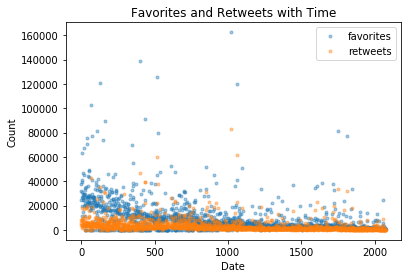

In [377]:
df[['favorites', 'retweets']].plot(style = '.', alpha = 0.4)
plt.title('Favorites and Retweets with Time')
plt.xlabel('Date')
plt.ylabel('Count');

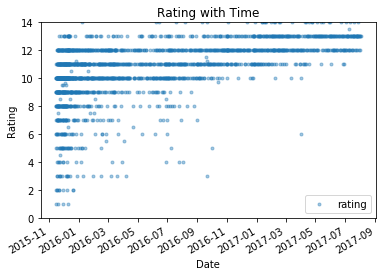

In [130]:
df.plot(y ='rating', ylim=[0,14], style = '.', alpha = 0.4)
plt.title('Rating with Time')
plt.xlabel('Date')
plt.ylabel('Rating');

Here you can see the gradual increase of both favorites and retweets over time.

So Brant was right, there are more ratings above 10. Still don't know the reason why there are so much high ratings.

So let's see if dogs with higher ratings were getting more favorites and retweets. According to me, if the dogs are getting better they should be getting more favorites and retweets along with the higher rating. There is a strong correlation between favorites and retweets. This means that if the tweet is good in general then there will be more retweets and favorites.

Yet there is no correlation between rating and retweets or rating and favorites. It can be because the dogs are not actually getting better. It can be that 'lower quality' dogs are given funnier captions. In this case, it is the caption that is getting more retweets and favorites, rather than the dog itself.

### Dog Stages Stats

### What is Most type of dogs?

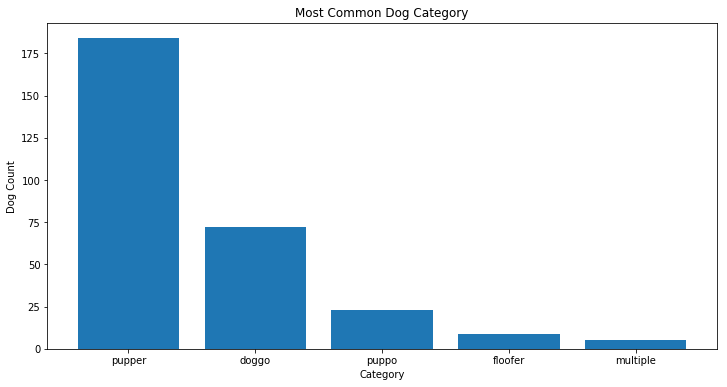

In [143]:
dog_type = ['pupper', 'doggo', 'puppo', 'floofer', 'multiple']
dog_counts = [184, 72, 23, 9, 5]

fig,ax = plt.subplots(figsize = (12,6))
ax.bar(dog_type, dog_counts, width = 0.8)
ax.set_ylabel('Dog Count')
ax.set_xlabel('Category')
plt.title("Most Common Dog Category")
plt.show()

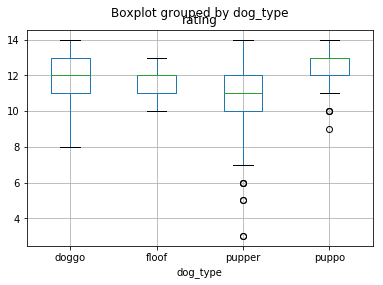

In [145]:
df.boxplot(column='rating', by='dog_type');

In [146]:
df.groupby('dog_type')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_type,,,,,,,,
doggo,69.0,11.797101,1.510548,8.0,11.0,12.0,13.0,14.0
floof,34.0,11.705882,0.759961,10.0,11.0,12.0,12.0,13.0
pupper,237.0,10.616160,1.833623,3.0,10.0,11.0,12.0,14.0
puppo,29.0,12.172414,1.197288,9.0,12.0,13.0,13.0,14.0


In [147]:
df.reset_index(inplace=True)
df.groupby('dog_type')['timestamp'].describe()

,count,unique,top,freq,first,last
dog_type,,,,,,
doggo,69,69,2016-11-18 23:35:32,1,2016-04-02 01:52:38,2017-07-26 15:59:51
floof,34,34,2016-07-05 20:41:01,1,2016-01-08 03:50:03,2017-07-18 00:07:08
pupper,237,237,2016-01-30 02:41:58,1,2015-11-26 21:36:12,2017-07-15 23:25:31
puppo,29,29,2017-01-29 02:44:34,1,2016-06-03 01:07:16,2017-07-25 01:55:32


So puppers are getting much lower rates than the other dog types. They have several low outliers which decrease the mean to 10.6.

Floofers are consistently rated above 10. I don't know whether they are really good or the rating just gets higher with time. Maybe we can see if 'floof' is a newer term.

Here we see that 'floof' is not a new term, first seen on January 2016. So we can say that floofer are consistently good dogs.

### Most Rated Breeds

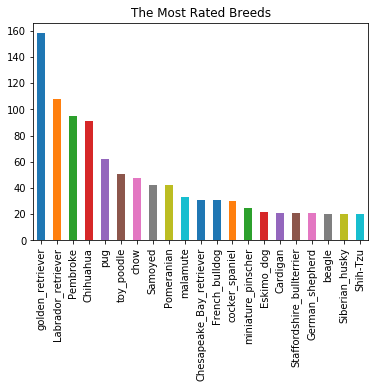

In [148]:
top=df.groupby('breed').filter(lambda x: len(x) >= 20)
top['breed'].value_counts().plot(kind = 'bar')
plt.title('The Most Rated Breeds');

It's difficult to know why these breeds are the top breeds. It could be because they are commonly owned. Or they could be the easiest to identify by the AI that identified them.

In [149]:
top.groupby('breed')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
breed,,,,,,,,
Cardigan,21.0,11.142857,1.590148,7.0,10.00,11.00,12.0,13.0
Chesapeake_Bay_retriever,31.0,10.741935,1.510358,8.0,10.00,10.00,12.0,13.0
Chihuahua,91.0,10.516484,2.071568,3.0,9.50,11.00,12.0,14.0
Eskimo_dog,22.0,11.409091,1.402688,9.0,10.00,12.00,12.0,14.0
French_bulldog,31.0,11.193548,1.796652,8.0,10.00,12.00,12.0,14.0
German_shepherd,21.0,11.000000,1.449138,8.0,10.00,11.00,12.0,13.0
Labrador_retriever,108.0,11.180556,1.324567,7.0,10.00,11.00,12.0,14.0
Pembroke,95.0,11.389474,1.746088,4.0,11.00,12.00,12.0,14.0
Pomeranian,42.0,10.779762,1.619435,6.0,10.00,11.00,12.0,14.0


In [150]:
df['rating'].describe()

count    1991.000000
mean       11.647638
std        40.668547
min         1.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating, dtype: float64

In [151]:
df[df['rating'] <= 14]['rating'].describe()

count    1989.000000
mean       10.555277
std         2.157977
min         1.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating, dtype: float64

Here we have a statistical comparison of the top breeds with all the ratings. Only one of the top breeds has a mean higher than the total population mean. This is because of these two ratings: 420 and 1776.

Excluding outliers bring down the mean to 10.55.